# Limipieza

In [73]:
# imports
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [74]:
# training df 
df_train = pd.read_csv('../../data/raw/customer_churn_dataset-training-master.csv')

#test df 
df_test = pd.read_csv('../../data/raw/customer_churn_dataset-testing-master.csv')

In [75]:
# drop nulls
df_train.dropna(axis=0, inplace=True)
# dtypes to int
df_train = df_train.astype({'CustomerID':'int', 'Age': 'int', 'Tenure':'int', 'Usage Frequency':'int', 'Support Calls':'int', 'Total Spend':'int', 'Last Interaction':'int',  'Churn':'int'})
# remove index (ID col)
df_train.drop(columns='CustomerID', inplace=True)
#columns to numeric
df_train['Gender'] = df_train['Gender'].map({'Male': 1, 'Female':0});
df_train['Subscription Type'] = df_train['Subscription Type'].map({'Basic':1, 'Standard':2,'Premium': 3})
df_train['Contract Length'] = df_train['Contract Length'].map({'Monthly':1, 'Quarterly':3,'Annual':12 })
#reorder cols 
columns = [col for col in df_train.columns if col != 'Churn'] + ['Churn']
df_train = df_train[columns]
#normalise column names 
df_train.rename(columns={'Age': 'age' , 'Gender': 'gender', 'Tenure': 'tenure', 'Usage Frequency': 'usage_frequency', 
                 'Support Calls':'support_calls', 'Payment Delay': 'payment_delay', 'Contract Length': 'contract_length', 
                 'Total Spend':'total_spend', 'Last Interaction': 'last_interaction', 'Subscription Type': 'subscription_type',
                 'Churn':'churn'}, inplace=True)

In [76]:
# preview: .head()
df_train.head(5)

,age,gender,tenure,usage_frequency,support_calls,payment_delay,subscription_type,contract_length,total_spend,last_interaction,churn
0,30,0,39,14,5,18.0,2,12,932,17,1
1,65,0,49,1,10,8.0,1,1,557,6,1
2,55,0,14,4,6,18.0,1,3,185,3,1
3,58,1,38,21,7,7.0,2,1,396,29,1
4,23,1,32,20,5,8.0,1,1,617,20,1


In [77]:
df_train.columns

Index(['age', 'gender', 'tenure', 'usage_frequency', 'support_calls',
       'payment_delay', 'subscription_type', 'contract_length', 'total_spend',
       'last_interaction', 'churn'],
      dtype='object')

In [78]:
df_train['churn'].value_counts(normalize=True)

churn
1    0.567107
0    0.432893
Name: proportion, dtype: float64

In [79]:
# drop nulls
df_test.dropna(axis=0, inplace=True)
# remove index (ID col)
df_test.drop(columns='CustomerID', inplace=True)
# dtypes to int
df_test = df_test.astype({'Age': 'int', 'Tenure':'int', 'Usage Frequency':'int', 'Support Calls':'int', 'Total Spend':'int', 'Last Interaction':'int',  'Churn':'int'})
#columns to numeric
df_test['Gender'] = df_test['Gender'].map({'Male': 1, 'Female':0});
df_test['Subscription Type'] = df_test['Subscription Type'].map({'Basic':1, 'Standard':2,'Premium': 3})
df_test['Contract Length'] = df_test['Contract Length'].map({'Monthly':1, 'Quarterly':3,'Annual':12 })
#reorder cols 
columns = [col for col in df_test.columns if col != 'Churn'] + ['Churn']
df_test = df_test[columns]
df_test.rename(columns={'Age': 'age', 'Gender' : 'gender', 'Tenure' : 'tenure', 'Usage Frequency' : 'usage_frequency', 
                        'Support Calls':'support_calls',
                        'Payment Delay': 'payment_delay', 'Subscription Type': 'subscription_type', 
                        'Contract Length':'contract_length', 'Total Spend':'total_spend',
                        'Last Interaction':'last_interaction', 'Churn':'churn'}, inplace=True)

In [80]:
# preview: .head()
df_test.head(5)

,age,gender,tenure,usage_frequency,support_calls,payment_delay,subscription_type,contract_length,total_spend,last_interaction,churn
0,22,0,25,14,4,27,1,1,598,9,1
1,41,0,28,28,7,13,2,1,584,20,0
2,47,1,27,10,2,29,3,12,757,21,0
3,35,1,9,12,5,17,3,3,232,18,0
4,53,0,58,24,9,2,2,12,533,18,0


In [81]:
df_test['churn'].value_counts(normalize=True)

churn
0    0.526315
1    0.473685
Name: proportion, dtype: float64

### Visualising uneven distribution of churn in datasets

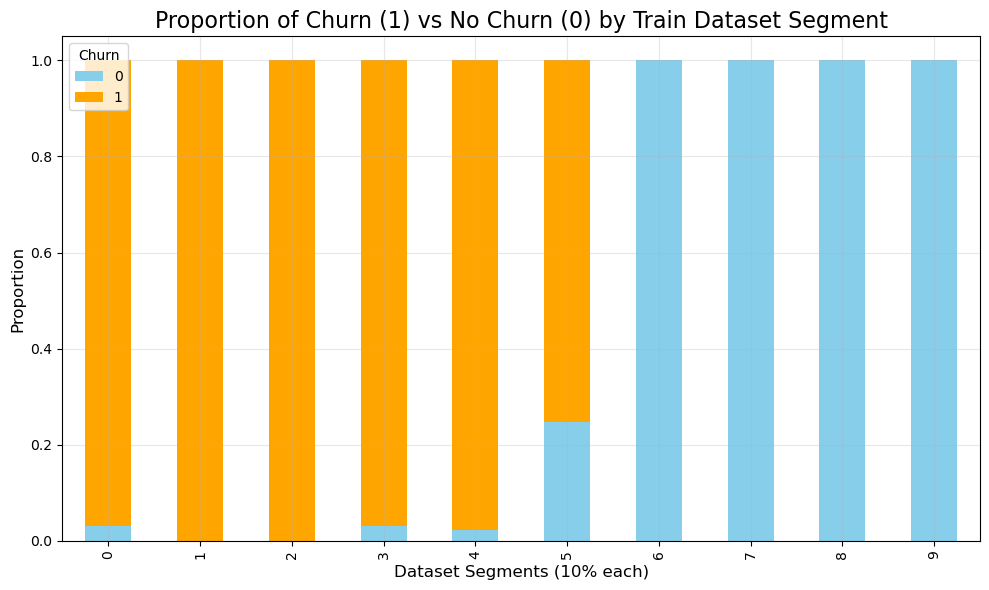

In [82]:
train_churn_growth_visualisation = df_train.copy()
train_churn_growth_visualisation['segment'] = pd.qcut(train_churn_growth_visualisation.index, q=10, labels=False)  # Divide into 10 segments
segment_churn = train_churn_growth_visualisation.groupby('segment')['churn'].value_counts(normalize=True).unstack()

# Plotting stacked bar chart
segment_churn.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'orange'])
plt.title('Proportion of Churn (1) vs No Churn (0) by Train Dataset Segment', fontsize=16)
plt.xlabel('Dataset Segments (10% each)', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.legend(title='Churn', loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

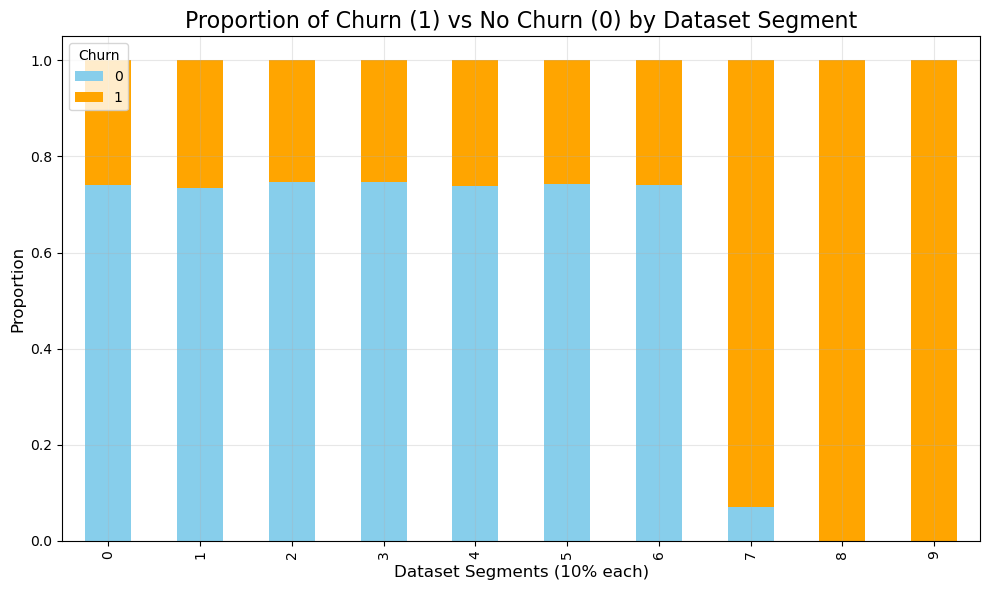

In [65]:
test_churn_growth_visualisation = df_test.copy()
test_churn_growth_visualisation['segment'] = pd.qcut(test_churn_growth_visualisation.index, q=10, labels=False)  # Divide into 10 segments
segment_churn = test_churn_growth_visualisation.groupby('segment')['churn'].value_counts(normalize=True).unstack()

# Plotting stacked bar chart
segment_churn.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'orange'])
plt.title('Proportion of Churn (1) vs No Churn (0) by Test Dataset Segment', fontsize=16)
plt.xlabel('Dataset Segments (10% each)', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.legend(title='Churn', loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### shuffle and change visualisation

In [68]:
#Viewing csv, I noticed that the churn/notchurn is not evenly ordered: shuffling data in both datasets.
from sklearn.utils import shuffle

# Shuffling 
df_train = shuffle(df_train, random_state=42).reset_index(drop=True)
df_test = shuffle(df_test, random_state=42).reset_index(drop=True)

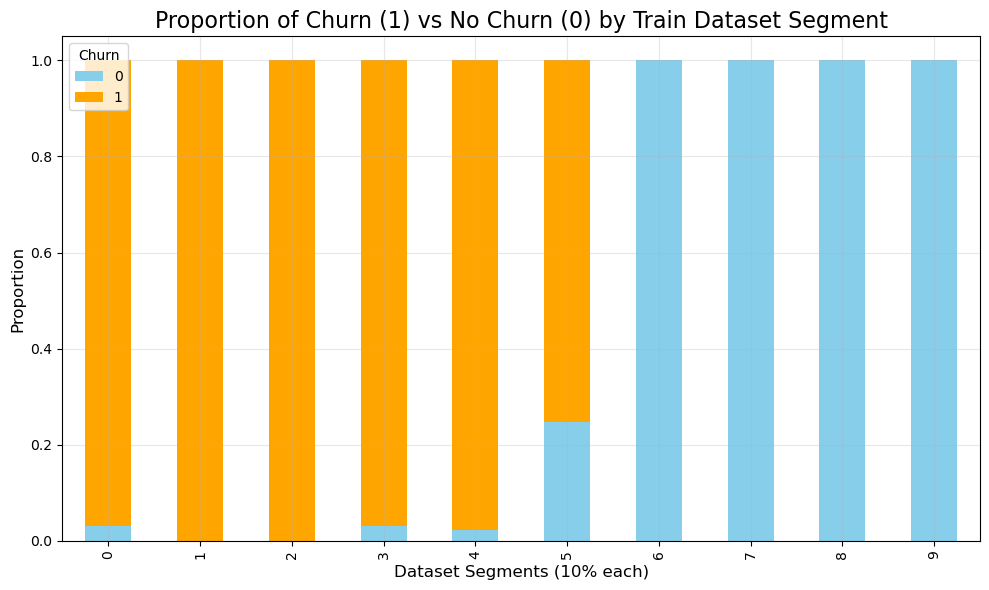

In [83]:
#visualising change
shuffle_train_visual = df_train.copy()
shuffle_train_visual['segment'] = pd.qcut(shuffle_train_visual.index, q=10, labels=False)  # Divide into 10 segments
segment_churn = shuffle_train_visual.groupby('segment')['churn'].value_counts(normalize=True).unstack()

# Plotting stacked bar chart
segment_churn.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'orange'])
plt.title('Proportion of Churn (1) vs No Churn (0) by Train Dataset Segment', fontsize=16)
plt.xlabel('Dataset Segments (10% each)', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.legend(title='Churn', loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

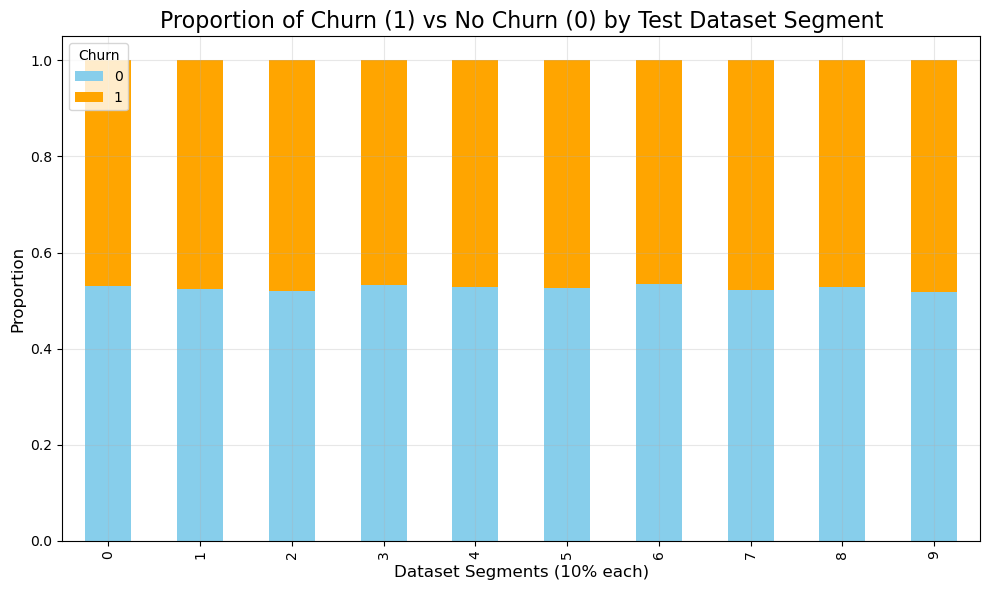

In [71]:
shuffle_test_visual = df_test.copy()
shuffle_test_visual['segment'] = pd.qcut(shuffle_test_visual.index, q=10, labels=False)  # Divide into 10 segments
segment_churn = shuffle_test_visual.groupby('segment')['churn'].value_counts(normalize=True).unstack()

# Plotting stacked bar chart
segment_churn.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'orange'])
plt.title('Proportion of Churn (1) vs No Churn (0) by Test Dataset Segment', fontsize=16)
plt.xlabel('Dataset Segments (10% each)', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.legend(title='Churn', loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

<Axes: >

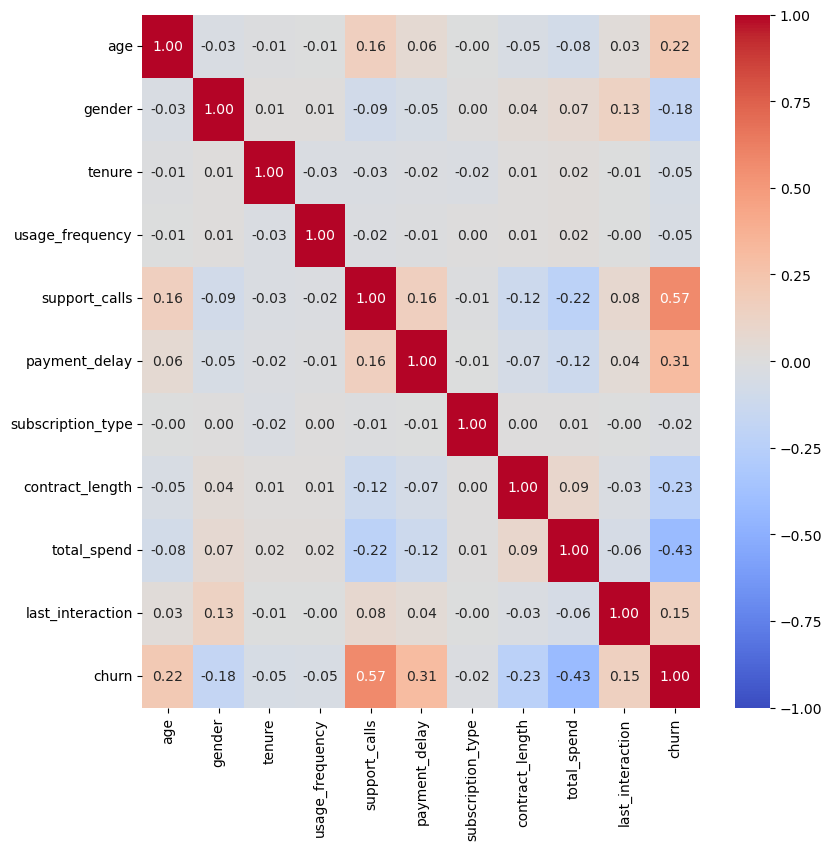

In [10]:
plt.figure(figsize=(9,9))
sns.heatmap(df_train.corr(), vmin=-1, annot=True, cmap='coolwarm', fmt='.2f')

## variable distribution comparison between provided train and test data

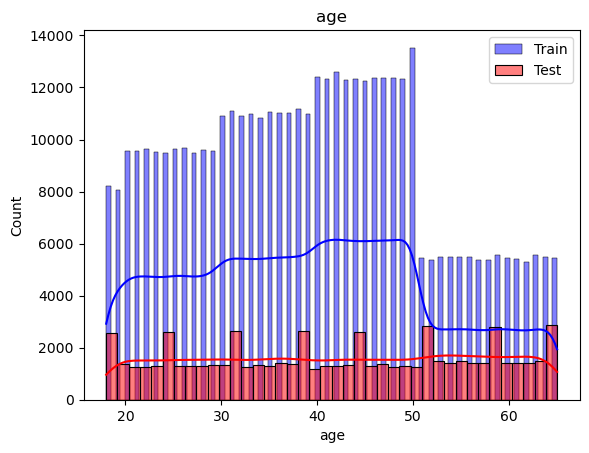

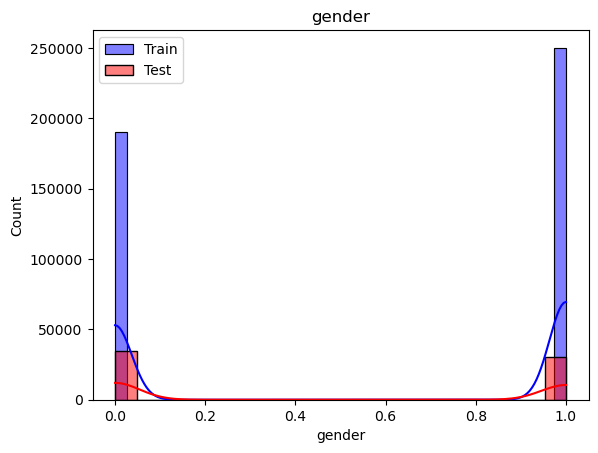

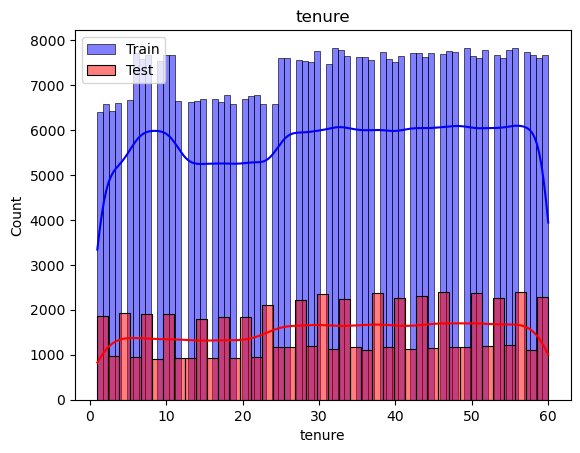

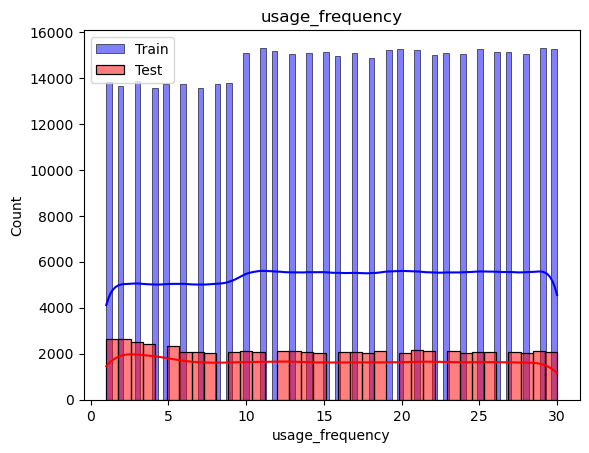

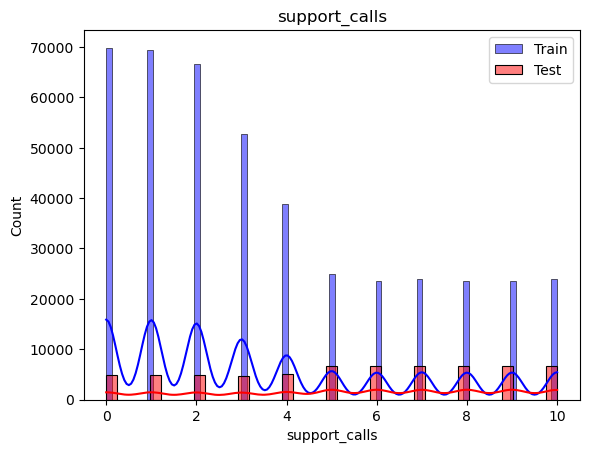

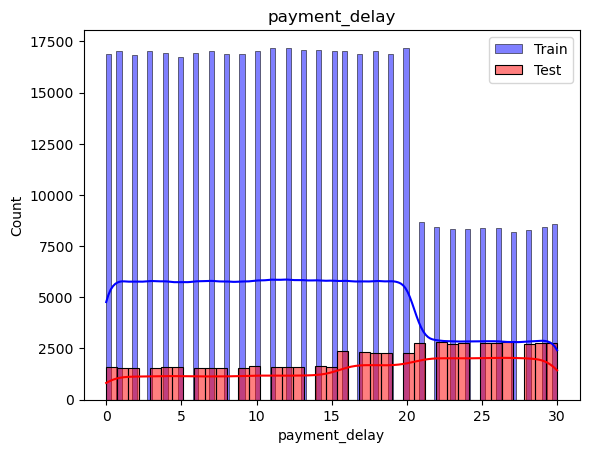

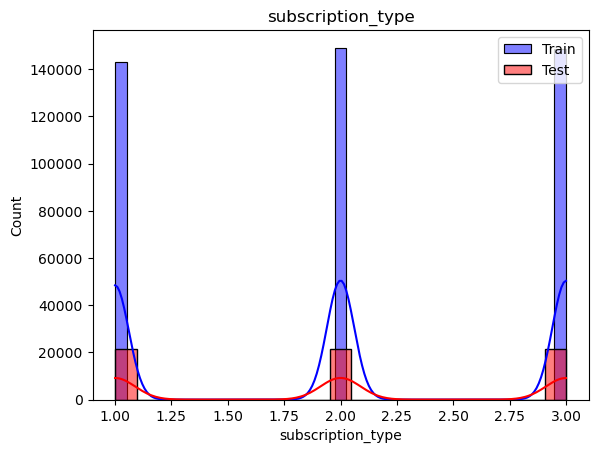

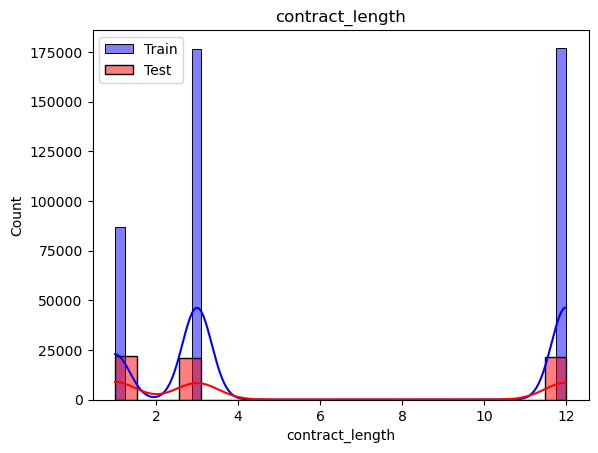

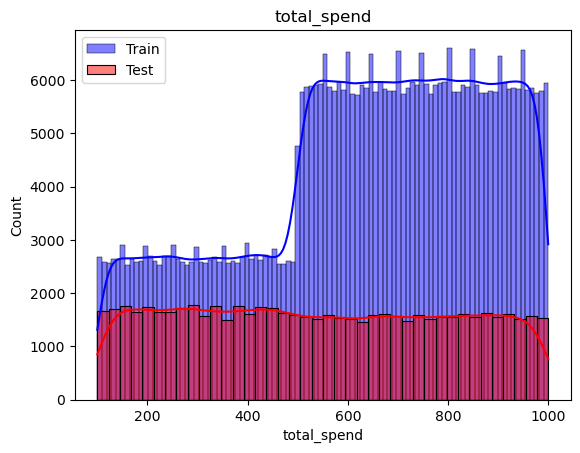

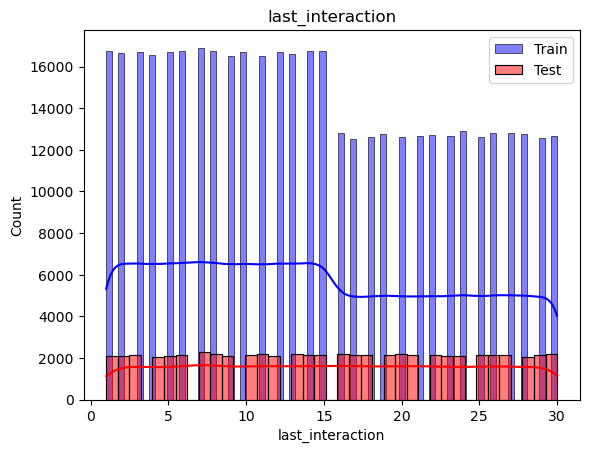

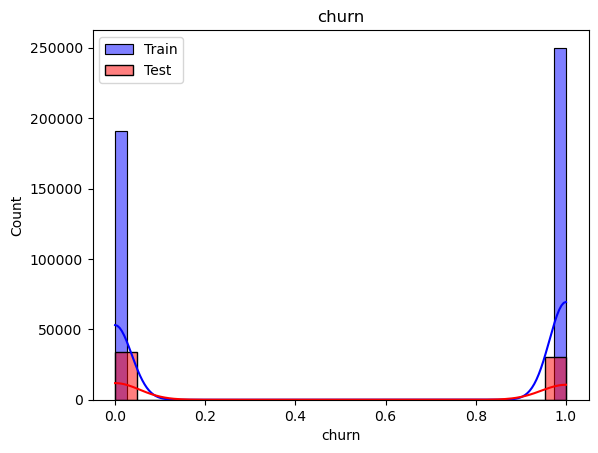

In [11]:
for column in df_train.columns:
    sns.histplot(df_train[column], color='blue', label='Train', kde=True)
    sns.histplot(df_test[column], color='red', label='Test', kde=True)
    plt.legend()
    plt.title(column)
    plt.show()


#### NB: might need to apply logarithmic scaling to reduced skew:
- **total_spend** skewed right in *train*, but level in test 
- **payment_delay** skewed left in *train*, but skewed right in test
- **suppport_calls** skewed left in *train*, but level in test 
- **last_interaction** skewed left in *train*, but level in test 

#### NB: Or, concat and create new train/test datasets
- Resulting train/test datasets would be more representative of the total population, avoiding skewness disparities. 

<Axes: >

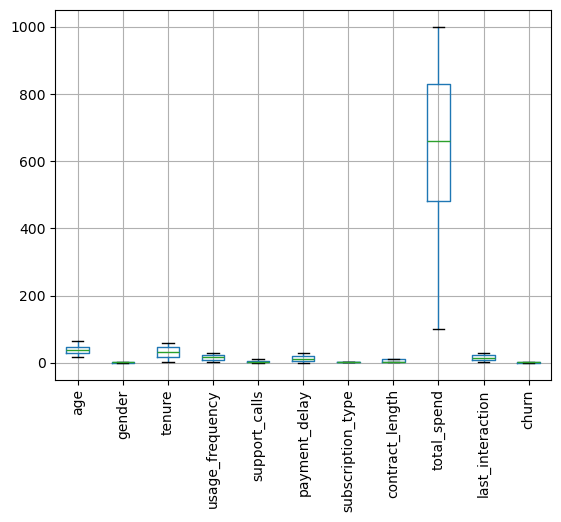

In [12]:
df_train.boxplot(rot=90)

<Axes: >

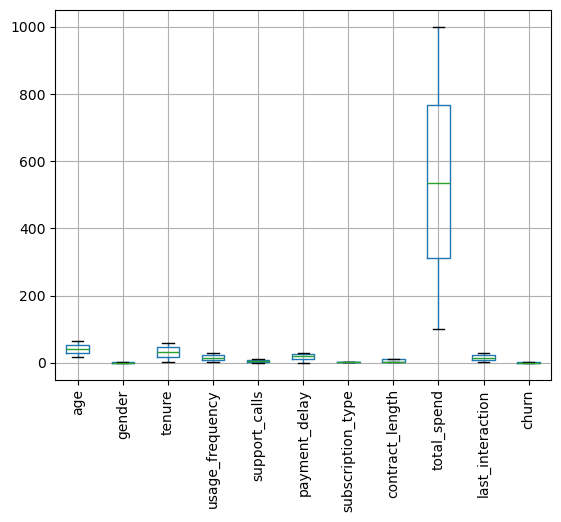

In [13]:
df_test.boxplot(rot=90)

#### NB: Might need to apply MinMaxScaler
- significant range difference in total_spend:

In [14]:
# concat, shuffle and split datasets to create new train/test 
from sklearn.model_selection import train_test_split


In [15]:
combined_df = pd.concat([df_test, df_train], axis=0)
combined_df = shuffle(combined_df, random_state=42)

X = combined_df.drop(columns='churn')
y = combined_df['churn']

# stratify=y ensures that both the training and test datasets maintain a similar distribution of the target variable churn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

train_df = pd.concat([X_train, y_train], axis=1)
print(train_df.size)
test_df = pd.concat([X_test, y_test], axis=1)
print(test_df.size)

3890084
1667182


In [16]:
train_df_valcount = train_df['churn'].value_counts(normalize=True)
test_df_valcount = test_df['churn'].value_counts(normalize=True)
print('new training data values count: churn', train_df_valcount)
print('new testing data values count: churn', test_df_valcount)

new training data values count: churn churn
1    0.555202
0    0.444798
Name: proportion, dtype: float64
new testing data values count: churn churn
1    0.555205
0    0.444795
Name: proportion, dtype: float64


### will likely need to apply **class_weight='balanced'** to relevant models and potentially **SMOTE**.
- ['churn'] still *imbalanced*, but in equal proportion across train and test.

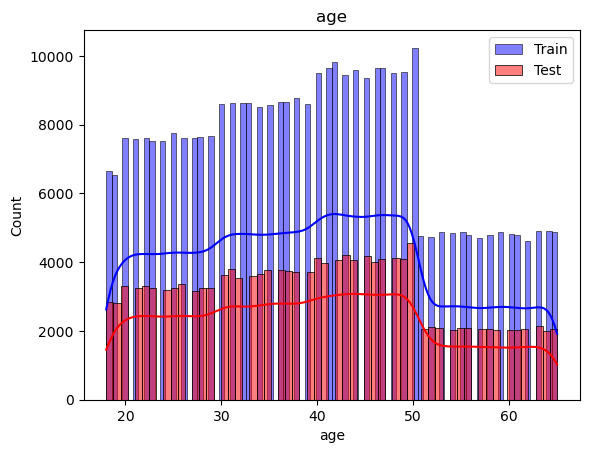

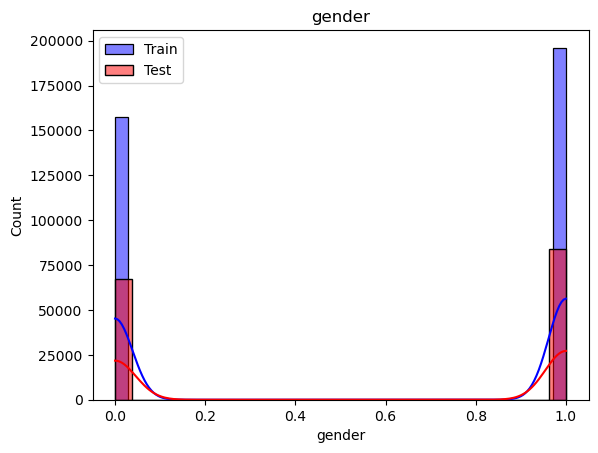

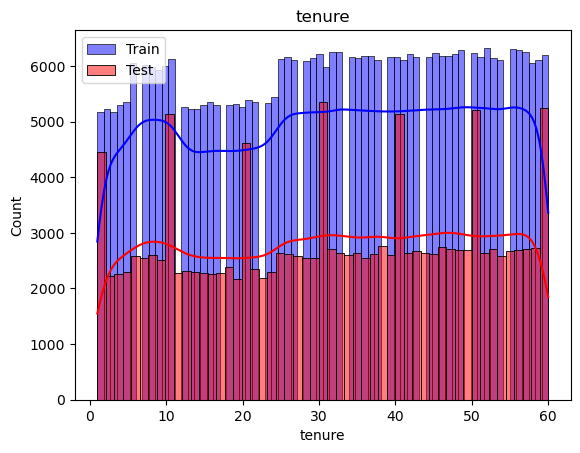

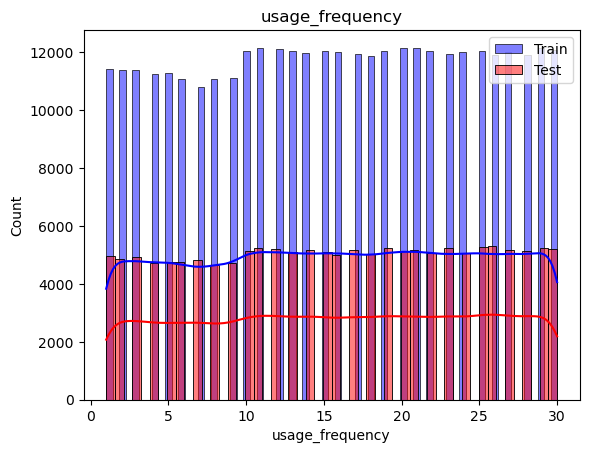

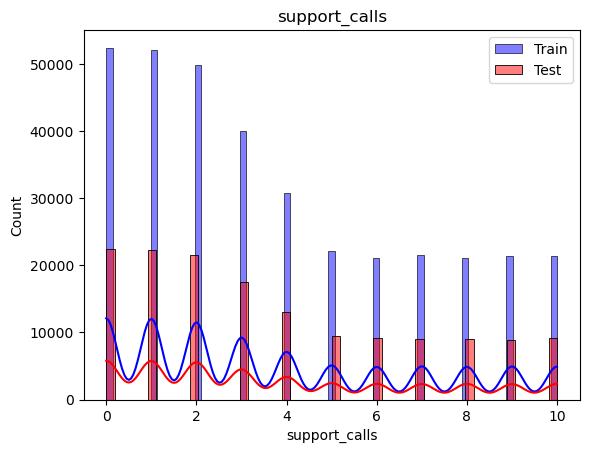

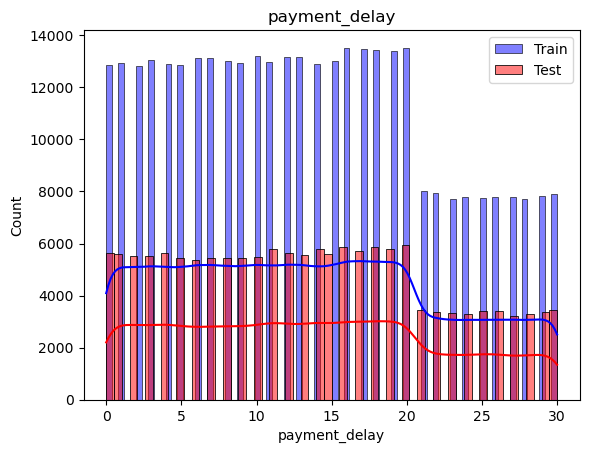

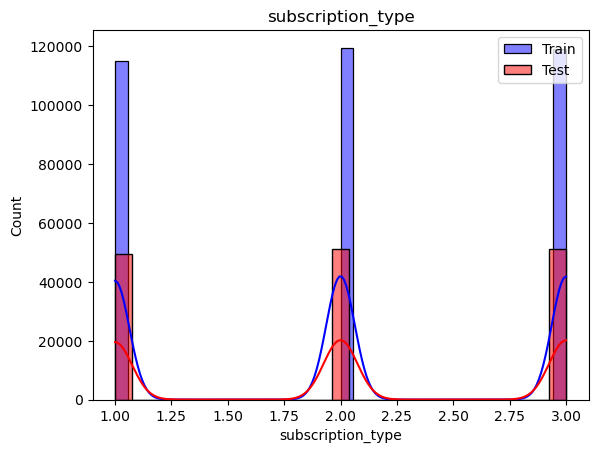

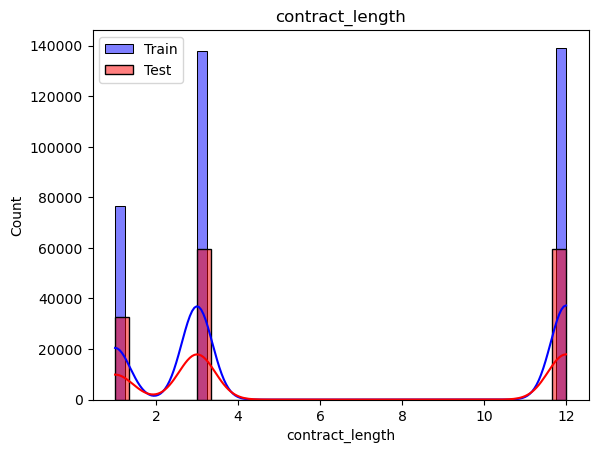

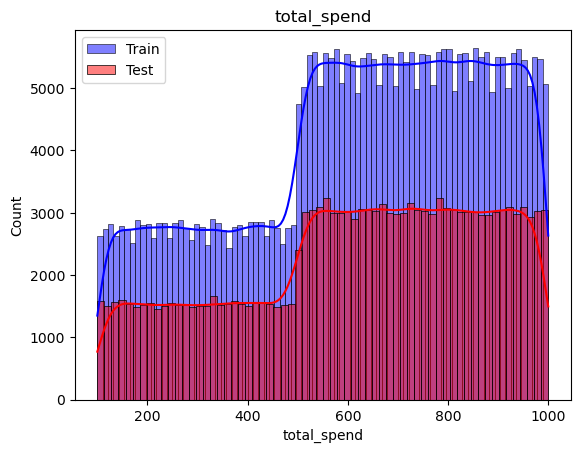

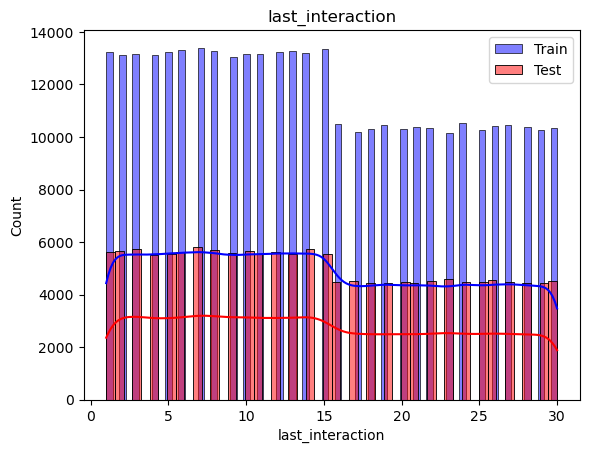

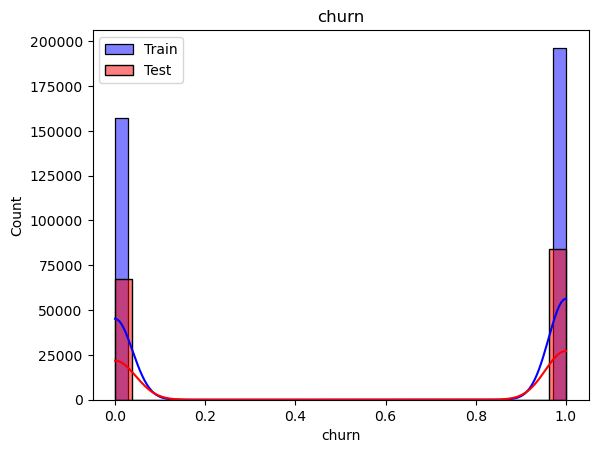

In [17]:
for column in train_df.columns:
    sns.histplot(train_df[column], color='blue', label='Train', kde=True)
    sns.histplot(test_df[column], color='red', label='Test', kde=True)
    plt.legend()
    plt.title(column)
    plt.show()

### Train and Test now representative
- skews closely mirrored in both train and test

In [21]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 353644 entries, 406677 to 386453
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   age                353644 non-null  int64  
 1   gender             353644 non-null  int64  
 2   tenure             353644 non-null  int64  
 3   usage_frequency    353644 non-null  int64  
 4   support_calls      353644 non-null  int64  
 5   payment_delay      353644 non-null  float64
 6   subscription_type  353644 non-null  int64  
 7   contract_length    353644 non-null  int64  
 8   total_spend        353644 non-null  int64  
 9   last_interaction   353644 non-null  int64  
 10  churn              353644 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 32.4 MB


In [22]:
train_df.shape

(353644, 11)

In [23]:
test_df.shape

(151562, 11)

In [ ]:
""" # saving new, clean, and representative train/test datasets
train_df.to_csv('../../data/train/customer_churn_dataset-training-clean.csv', index=False, header=True)
test_df.to_csv('../../data/test/customer_churn_dataset-testing-clean.csv', index=False, header=True) """